In [1]:
# Based on original Jupyter Notebook by David Koes

In [2]:
import numpy as np
import pandas as pd
from scipy import stats

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
exhaustiveness = 8

In [5]:
flfname = f'../data/crossdocking-flex/cd-carlos-CNNrescore-e{exhaustiveness}-d3.5-LIG.csv'

flexlig = pd.read_csv(flfname).rename(columns={"rmsd": "rmsd_lig", "molids": "molids_lig"}).drop(columns="tag")
flexlig.pocket = flexlig.pocket.str.replace("/PDB_Structures/", "").str.strip() # Remove path from pocket name
flexlig

molids_lig  rmsd_lig  cnnscore  cnnaffinity  \
0      3EML_ZMA_A_401:3EML_ZMA_A_401   6.98059  0.842898     7.073944   
1      3EML_ZMA_A_401:3EML_ZMA_A_401   7.21039  0.833297     0.357896   
2      3EML_ZMA_A_401:3EML_ZMA_A_401   9.08965  0.782344     7.130491   
3      3EML_ZMA_A_401:3EML_ZMA_A_401   9.29061  0.762929     0.198129   
4      3EML_ZMA_A_401:3EML_ZMA_A_401   6.13753  0.748435     6.971288   
...                              ...       ...       ...          ...   
81317  5C7A_4YE_A_402:5C7A_4YE_A_402  10.32820  0.529529     0.581109   
81318  5C7A_4YE_A_402:5C7A_4YE_A_402  10.34450  0.529444     4.382333   
81319  5C7A_4YE_A_402:5C7A_4YE_A_402  17.66560  0.486497     0.470185   
81320  5C7A_4YE_A_402:5C7A_4YE_A_402   8.90836  0.465802     4.023231   
81321  5C7A_4YE_A_402:5C7A_4YE_A_402  17.65040  0.462651     0.569908   

       minimizedAffinity pocket   rec   lig  
0              -10.30702  AA2AR  3QAK  3EML  
1              -10.99423  AA2AR  3QAK  3EML  
2               -9.69798  AA2AR  3QAK  3EML  
3               -9.99973  AA2AR  3QAK  3EML  
4              -10.31872  AA2AR  3QAK  3EML  
...                  ...    ...   ...   ...  
81317           -5.59953   XIAP  3G76  5C7A  
81318           -6.96083   XIAP  3G76  5C7A  
81319           -6.47080   XIAP  3G76  5C7A  
81320           -6.71381   XIAP  3G76  5C7A  
81321           -6.50689   XIAP  3G76  5C7A  

[81322 rows x 8 columns]

In [6]:
frfname = f'../data/crossdocking-flex/cd-carlos-CNNrescore-e{exhaustiveness}-d3.5-FLEX.csv'

# This contains side chain RMSD between input (target) and output (pose)
flexrec = pd.read_csv(frfname).rename(columns={"rmsd": "target-pose_rmsd", "molids": "molids_rec"}).drop(columns="tag")
flexrec.pocket = flexrec.pocket.str.replace("/PDB_Structures/", "").str.strip() # Remove path from pocket name

flexrec

molids_rec  target-pose_rmsd  \
0      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...           1.38707   
1      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...           1.52698   
2      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...           1.41695   
3      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...           1.60430   
4      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AA2AR/P...           1.41815   
...                                                  ...               ...   
81057  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...           1.85098   
81058  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...           2.25624   
81059  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...           2.17718   
81060  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...           1.28246   
81061  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...           1.67127   

      pocket   rec   lig  
0      AA2AR  3QAK  3EML  
1      AA2AR  3QAK  3EML  
2      AA2AR  3QAK  3EML  
3      AA2AR  3QAK  3EML  
4      AA2AR  3QAK  3EML  
...      ...   ...   ...  
81057   XIAP  3G76  5C7A  
81058   XIAP  3G76  5C7A  
81059   XIAP  3G76  5C7A  
81060   XIAP  3G76  5C7A  
81061   XIAP  3G76  5C7A  

[81062 rows x 5 columns]

In [7]:
# Load data for rigid docking
# Data from Paul
rigid= pd.read_csv('../data/crossdocking-flex/final_def_ensemble_rescore_defaults.csv')
rigid.rec = rigid.rec.str.slice(-4).str.strip() # Remove path from rec name
rigid.pocket = rigid.pocket.str.replace("/PDB_Structures/", "").str.strip() # Remove path from pocket name

rigid

tag                           molids      rmsd  cnnscore  \
0      defaults  3QAK_UKA_A_1200:3QAK_UKA_A_1200  12.11020  0.301147   
1      defaults  3QAK_UKA_A_1200:3QAK_UKA_A_1200  12.50650  0.208695   
2      defaults  3QAK_UKA_A_1200:3QAK_UKA_A_1200  13.18390  0.184682   
3      defaults  3QAK_UKA_A_1200:3QAK_UKA_A_1200  12.54770  0.182141   
4      defaults  3QAK_UKA_A_1200:3QAK_UKA_A_1200  10.77710  0.176975   
...         ...                              ...       ...       ...   
71702  defaults    5C3K_4XF_A_402:5C3K_4XF_A_402   5.74781  0.634539   
71703  defaults    5C3K_4XF_A_402:5C3K_4XF_A_402   5.43635  0.619502   
71704  defaults    5C3K_4XF_A_402:5C3K_4XF_A_402   8.00052  0.591508   
71705  defaults    5C3K_4XF_A_402:5C3K_4XF_A_402  10.20340  0.567792   
71706  defaults    5C3K_4XF_A_402:5C3K_4XF_A_402   9.24777  0.519345   

       cnnaffinity  minimizedAffinity pocket   rec   lig  
0         7.290389          -10.66544  AA2AR  3EML  3QAK  
1         0.537906           -9.09964  AA2AR  3EML  3QAK  
2         6.905550          -10.15615  AA2AR  3EML  3QAK  
3         0.102756           -8.79749  AA2AR  3EML  3QAK  
4         6.870663          -10.63542  AA2AR  3EML  3QAK  
...            ...                ...    ...   ...   ...  
71702     3.836325           -5.31584   XIAP  3G76  5C3K  
71703     0.129123           -5.06683   XIAP  3G76  5C3K  
71704     3.458242           -4.41025   XIAP  3G76  5C3K  
71705     0.314778           -5.61288   XIAP  3G76  5C3K  
71706     3.484066           -5.22737   XIAP  3G76  5C3K  

[71707 rows x 9 columns]

`flexlig` and `flexrec` have a different number of rows. This is likely due to systems were no flexible residues were identified. This can be caused by problematic systems. In order to find such systems, the overlap between `rigid` and `flexlig` and `flexrec` can be computed after removing problematic systems.

In [8]:
pocketdiff = pd.read_csv("../data/crossdocking-flex/pocketdiff.csv", index_col=0)
assert len(pocketdiff) == 7970
print(pocketdiff)

       rec   lig  pocket_change  backbone_change
0     2C64  2XFN       0.151545         0.126702
1     2XFN  2C64       0.153927         0.125985
2     1B3R  1KY4       0.237336         0.123233
3     1KY4  1B3R       0.257150         0.148770
4     3EML  3QAK       2.114589         1.665561
...    ...   ...            ...              ...
7965  3G76  5C7D       0.981363         0.733994
7966  3G76  5C7A       1.095492         0.806999
7967  3G76  3HL5       0.907245         0.369391
7968  3G76  4KMP       1.018672         0.417608
7969  3G76  5C3K       0.679859         0.480125

[7970 rows x 4 columns]


In [9]:
# Use ligands in POCKETDIFF to filter out unwanted ligands from before
to_keep = pocketdiff[["lig", "rec"]]

# Keep only keys found in to_keep
rigid = pd.merge(rigid, to_keep, how="right", on=["lig", "rec"])
flexlig = pd.merge(flexlig, to_keep, how="right", on=["lig", "rec"])
flexrec = pd.merge(flexrec, to_keep, how="right", on=["lig", "rec"])

print(rigid.isnull().any().any(), flexlig.isnull().any().any())

assert rigid.isnull().any().any() == False
assert flexlig.isnull().any().any() == False

# Drop NaNs
# systems not found in to_keep
flexlig = flexlig.dropna()
flexrec = flexrec.dropna()

False False


In [10]:
# Identify possible differences between rigid and flexible docking
rigidgen = ((p, l, r) for p, l, r in zip(rigid.pocket, rigid.lig, rigid.rec))
flexRgen = ((p, l, r) for p, l, r in zip(flexrec.pocket, flexrec.lig, flexrec.rec))
flexLgen = ((p, l, r) for p, l, r in zip(flexlig.pocket, flexlig.lig, flexlig.rec))

rigidset = set(rigidgen)
flexRset = set(flexRgen)
flexLset = set(flexLgen)

print(len(rigidset), len(flexRset), len(flexLset))
assert len(rigidset) == len(flexLset) == 7970
print(len(flexRset))
print(len(rigidset) - len(flexRset), len(rigidset) - len(flexLset))

print(rigidset - flexRset)
print(rigidset - flexLset)


flexfail = (rigidset - flexRset).union(rigidset - flexLset)
print(len(flexfail))
flexfail

7970 7946 7970
7946
24 0
{('ACES', '2CMF', '1JJB'), ('MK01', '4ZZM', '4GSB'), ('IGF1R', '3NW6', '5FXR'), ('JAK2', '4E4M', '4F08'), ('IGF1R', '2ZM3', '5FXR'), ('SRC', '5D10', '3UQG'), ('ACES', '1ACJ', '1JJB'), ('IGF1R', '2OJ9', '5FXR'), ('MK10', '2G01', '1UKI'), ('SRC', '5J5S', '3UQG'), ('IGF1R', '3NW7', '5FXR'), ('MK10', '3RTP', '1UKI'), ('IGF1R', '3LVP', '5FXR'), ('IGF1R', '1JQH', '5FXR'), ('MK01', '4FV2', '4GSB'), ('MK10', '4L7F', '4HYS'), ('JAK2', '5CF6', '4F08'), ('ACES', '1ZGB', '1JJB'), ('MK10', '3ELJ', '1UKI'), ('SRC', '3DQX', '3UQG'), ('CDK2', '3IG7', '3QQJ'), ('MK01', '5NHV', '4GSB'), ('JAK2', '4D0W', '4F08'), ('MK01', '5LCJ', '4GSB')}
set()
24


{('ACES', '1ACJ', '1JJB'),
 ('ACES', '1ZGB', '1JJB'),
 ('ACES', '2CMF', '1JJB'),
 ('CDK2', '3IG7', '3QQJ'),
 ('IGF1R', '1JQH', '5FXR'),
 ('IGF1R', '2OJ9', '5FXR'),
 ('IGF1R', '2ZM3', '5FXR'),
 ('IGF1R', '3LVP', '5FXR'),
 ('IGF1R', '3NW6', '5FXR'),
 ('IGF1R', '3NW7', '5FXR'),
 ('JAK2', '4D0W', '4F08'),
 ('JAK2', '4E4M', '4F08'),
 ('JAK2', '5CF6', '4F08'),
 ('MK01', '4FV2', '4GSB'),
 ('MK01', '4ZZM', '4GSB'),
 ('MK01', '5LCJ', '4GSB'),
 ('MK01', '5NHV', '4GSB'),
 ('MK10', '2G01', '1UKI'),
 ('MK10', '3ELJ', '1UKI'),
 ('MK10', '3RTP', '1UKI'),
 ('MK10', '4L7F', '4HYS'),
 ('SRC', '3DQX', '3UQG'),
 ('SRC', '5D10', '3UQG'),
 ('SRC', '5J5S', '3UQG')}

In [11]:
for p, l, r in flexfail:
    print(f"{p} & {r} & {l} & No flexible residues \\\\")

IGF1R & 5FXR & 2OJ9 & No flexible residues \\
MK10 & 1UKI & 2G01 & No flexible residues \\
SRC & 3UQG & 5J5S & No flexible residues \\
IGF1R & 5FXR & 3NW7 & No flexible residues \\
MK10 & 1UKI & 3RTP & No flexible residues \\
IGF1R & 5FXR & 3LVP & No flexible residues \\
ACES & 1JJB & 2CMF & No flexible residues \\
IGF1R & 5FXR & 1JQH & No flexible residues \\
MK01 & 4GSB & 4ZZM & No flexible residues \\
MK01 & 4GSB & 4FV2 & No flexible residues \\
MK10 & 4HYS & 4L7F & No flexible residues \\
JAK2 & 4F08 & 5CF6 & No flexible residues \\
ACES & 1JJB & 1ZGB & No flexible residues \\
MK10 & 1UKI & 3ELJ & No flexible residues \\
JAK2 & 4F08 & 4D0W & No flexible residues \\
SRC & 3UQG & 3DQX & No flexible residues \\
MK01 & 4GSB & 5LCJ & No flexible residues \\
IGF1R & 5FXR & 3NW6 & No flexible residues \\
JAK2 & 4F08 & 4E4M & No flexible residues \\
CDK2 & 3QQJ & 3IG7 & No flexible residues \\
MK01 & 4GSB & 5NHV & No flexible residues \\
IGF1R & 5FXR & 2ZM3 & No flexible residues \\
SRC & 

In [12]:
# Remove systems without flexible RMSD from both flexlig and rigid
failpockets = np.array(list(set(p for p, _, _ in flexfail)))
failligs = np.array(list(set(l for _, l, _ in flexfail)))
failrecs = np.array(list(set(r for _, _, r in flexfail)))

flexlig = flexlig[~(np.isin(flexlig.pocket.to_numpy(), failpockets) & np.isin(flexlig.lig.to_numpy(), failligs) & np.isin(flexlig.rec.to_numpy(), failrecs))]

rigid = rigid[~(np.isin(rigid.pocket.to_numpy(), failpockets) & np.isin(rigid.lig.to_numpy(), failligs) & np.isin(rigid.rec.to_numpy(), failrecs))]

assert len(flexlig) == len(flexrec)
print(len(flexlig), len(flexrec))

79422 79422


In [13]:
# Generate paths to GNINA log files for easy checks
for p, l, r in flexfail:
    print(f"carlos_cd/{p}/PDB_Structures/{l}_LIG_aligned-{r}_PRO-gnina.log \\")

carlos_cd/IGF1R/PDB_Structures/2OJ9_LIG_aligned-5FXR_PRO-gnina.log \
carlos_cd/MK10/PDB_Structures/2G01_LIG_aligned-1UKI_PRO-gnina.log \
carlos_cd/SRC/PDB_Structures/5J5S_LIG_aligned-3UQG_PRO-gnina.log \
carlos_cd/IGF1R/PDB_Structures/3NW7_LIG_aligned-5FXR_PRO-gnina.log \
carlos_cd/MK10/PDB_Structures/3RTP_LIG_aligned-1UKI_PRO-gnina.log \
carlos_cd/IGF1R/PDB_Structures/3LVP_LIG_aligned-5FXR_PRO-gnina.log \
carlos_cd/ACES/PDB_Structures/2CMF_LIG_aligned-1JJB_PRO-gnina.log \
carlos_cd/IGF1R/PDB_Structures/1JQH_LIG_aligned-5FXR_PRO-gnina.log \
carlos_cd/MK01/PDB_Structures/4ZZM_LIG_aligned-4GSB_PRO-gnina.log \
carlos_cd/MK01/PDB_Structures/4FV2_LIG_aligned-4GSB_PRO-gnina.log \
carlos_cd/MK10/PDB_Structures/4L7F_LIG_aligned-4HYS_PRO-gnina.log \
carlos_cd/JAK2/PDB_Structures/5CF6_LIG_aligned-4F08_PRO-gnina.log \
carlos_cd/ACES/PDB_Structures/1ZGB_LIG_aligned-1JJB_PRO-gnina.log \
carlos_cd/MK10/PDB_Structures/3ELJ_LIG_aligned-1UKI_PRO-gnina.log \
carlos_cd/JAK2/PDB_Structures/4D0W_LIG_aligne

In [14]:
# Reindex flexlig as flexrec
# Otherwise concatenation will add NaNs where indices do not match
flexlig.reset_index(inplace=True, drop=True)
flexlig["pose"] = flexlig.groupby(["pocket", "lig", "rec"]).cumcount()
flexlig

molids_lig   rmsd_lig  cnnscore  cnnaffinity  \
0      2XFN_FAD_A_1500:2XFN_FAD_A_1500   0.516543  0.864615     7.123694   
1      2XFN_FAD_A_1500:2XFN_FAD_A_1500   3.600020  0.550705     0.056932   
2      2XFN_FAD_A_1500:2XFN_FAD_A_1500   2.241220  0.360108     6.770334   
3      2XFN_FAD_A_1500:2XFN_FAD_A_1500  14.266300  0.335883     0.008065   
4      2XFN_FAD_A_1500:2XFN_FAD_A_1500  14.364800  0.298588     6.104539   
...                                ...        ...       ...          ...   
79417    5C3K_4XF_A_402:5C3K_4XF_A_402  10.707800  0.751864     0.308074   
79418    5C3K_4XF_A_402:5C3K_4XF_A_402  11.897200  0.713376     3.989370   
79419    5C3K_4XF_A_402:5C3K_4XF_A_402   9.554620  0.703115     0.220847   
79420    5C3K_4XF_A_402:5C3K_4XF_A_402  13.385100  0.651406     4.060548   
79421    5C3K_4XF_A_402:5C3K_4XF_A_402  12.761000  0.650551     0.195244   

       minimizedAffinity pocket   rec   lig  pose  
0              -16.56715   AOFB  2C64  2XFN     0  
1              -15.58975   AOFB  2C64  2XFN     1  
2              -15.55271   AOFB  2C64  2XFN     2  
3              -10.38974   AOFB  2C64  2XFN     3  
4               -8.85779   AOFB  2C64  2XFN     4  
...                  ...    ...   ...   ...   ...  
79417           -6.87362   XIAP  3G76  5C3K     5  
79418           -6.56364   XIAP  3G76  5C3K     6  
79419           -6.90788   XIAP  3G76  5C3K     7  
79420           -6.16575   XIAP  3G76  5C3K     8  
79421           -5.96928   XIAP  3G76  5C3K     9  

[79422 rows x 9 columns]

In [15]:
flexrec.reset_index(inplace=True, drop=True)
flexrec["pose"] = flexrec.groupby(["pocket", "lig", "rec"]).cumcount()
flexrec

molids_rec  target-pose_rmsd  \
0      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AOFB/PD...          0.484648   
1      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AOFB/PD...          0.729286   
2      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AOFB/PD...          1.642640   
3      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AOFB/PD...          1.470220   
4      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AOFB/PD...          1.559520   
...                                                  ...               ...   
79417  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...          2.206780   
79418  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...          1.562240   
79419  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...          1.587700   
79420  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...          1.946700   
79421  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...          2.068770   

      pocket   rec   lig  pose  
0       AOFB  2C64  2XFN     0  
1       AOFB  2C64  2XFN     1  
2       AOFB  2C64  2XFN     2  
3       AOFB  2C64  2XFN     3  
4       AOFB  2C64  2XFN     4  
...      ...   ...   ...   ...  
79417   XIAP  3G76  5C3K     5  
79418   XIAP  3G76  5C3K     6  
79419   XIAP  3G76  5C3K     7  
79420   XIAP  3G76  5C3K     8  
79421   XIAP  3G76  5C3K     9  

[79422 rows x 6 columns]

In [16]:
# Merge LIG and FLEX data into a single dataframe

flex = pd.merge(flexlig, flexrec, how="left", on=["pocket", "lig", "rec", "pose"], suffixes=['_lig','_rec'])

assert len(flex) == len(flexlig) == len(flexrec)

flex

molids_lig   rmsd_lig  cnnscore  cnnaffinity  \
0      2XFN_FAD_A_1500:2XFN_FAD_A_1500   0.516543  0.864615     7.123694   
1      2XFN_FAD_A_1500:2XFN_FAD_A_1500   3.600020  0.550705     0.056932   
2      2XFN_FAD_A_1500:2XFN_FAD_A_1500   2.241220  0.360108     6.770334   
3      2XFN_FAD_A_1500:2XFN_FAD_A_1500  14.266300  0.335883     0.008065   
4      2XFN_FAD_A_1500:2XFN_FAD_A_1500  14.364800  0.298588     6.104539   
...                                ...        ...       ...          ...   
79417    5C3K_4XF_A_402:5C3K_4XF_A_402  10.707800  0.751864     0.308074   
79418    5C3K_4XF_A_402:5C3K_4XF_A_402  11.897200  0.713376     3.989370   
79419    5C3K_4XF_A_402:5C3K_4XF_A_402   9.554620  0.703115     0.220847   
79420    5C3K_4XF_A_402:5C3K_4XF_A_402  13.385100  0.651406     4.060548   
79421    5C3K_4XF_A_402:5C3K_4XF_A_402  12.761000  0.650551     0.195244   

       minimizedAffinity pocket   rec   lig  pose  \
0              -16.56715   AOFB  2C64  2XFN     0   
1              -15.58975   AOFB  2C64  2XFN     1   
2              -15.55271   AOFB  2C64  2XFN     2   
3              -10.38974   AOFB  2C64  2XFN     3   
4               -8.85779   AOFB  2C64  2XFN     4   
...                  ...    ...   ...   ...   ...   
79417           -6.87362   XIAP  3G76  5C3K     5   
79418           -6.56364   XIAP  3G76  5C3K     6   
79419           -6.90788   XIAP  3G76  5C3K     7   
79420           -6.16575   XIAP  3G76  5C3K     8   
79421           -5.96928   XIAP  3G76  5C3K     9   

                                              molids_rec  target-pose_rmsd  
0      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AOFB/PD...          0.484648  
1      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AOFB/PD...          0.729286  
2      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AOFB/PD...          1.642640  
3      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AOFB/PD...          1.470220  
4      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AOFB/PD...          1.559520  
...                                                  ...               ...  
79417  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...          2.206780  
79418  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...          1.562240  
79419  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...          1.587700  
79420  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...          1.946700  
79421  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...          2.068770  

[79422 rows x 11 columns]

In [17]:
flex = pd.merge(flex, pocketdiff, on=["rec", "lig"]).rename(columns={"pocket_change": "target-cognate_rmsd"}).drop(columns="backbone_change")
assert len(flex) == len(flexlig) == len(flexrec)
flex

molids_lig   rmsd_lig  cnnscore  cnnaffinity  \
0      2XFN_FAD_A_1500:2XFN_FAD_A_1500   0.516543  0.864615     7.123694   
1      2XFN_FAD_A_1500:2XFN_FAD_A_1500   3.600020  0.550705     0.056932   
2      2XFN_FAD_A_1500:2XFN_FAD_A_1500   2.241220  0.360108     6.770334   
3      2XFN_FAD_A_1500:2XFN_FAD_A_1500  14.266300  0.335883     0.008065   
4      2XFN_FAD_A_1500:2XFN_FAD_A_1500  14.364800  0.298588     6.104539   
...                                ...        ...       ...          ...   
79417    5C3K_4XF_A_402:5C3K_4XF_A_402  10.707800  0.751864     0.308074   
79418    5C3K_4XF_A_402:5C3K_4XF_A_402  11.897200  0.713376     3.989370   
79419    5C3K_4XF_A_402:5C3K_4XF_A_402   9.554620  0.703115     0.220847   
79420    5C3K_4XF_A_402:5C3K_4XF_A_402  13.385100  0.651406     4.060548   
79421    5C3K_4XF_A_402:5C3K_4XF_A_402  12.761000  0.650551     0.195244   

       minimizedAffinity pocket   rec   lig  pose  \
0              -16.56715   AOFB  2C64  2XFN     0   
1              -15.58975   AOFB  2C64  2XFN     1   
2              -15.55271   AOFB  2C64  2XFN     2   
3              -10.38974   AOFB  2C64  2XFN     3   
4               -8.85779   AOFB  2C64  2XFN     4   
...                  ...    ...   ...   ...   ...   
79417           -6.87362   XIAP  3G76  5C3K     5   
79418           -6.56364   XIAP  3G76  5C3K     6   
79419           -6.90788   XIAP  3G76  5C3K     7   
79420           -6.16575   XIAP  3G76  5C3K     8   
79421           -5.96928   XIAP  3G76  5C3K     9   

                                              molids_rec  target-pose_rmsd  \
0      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AOFB/PD...          0.484648   
1      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AOFB/PD...          0.729286   
2      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AOFB/PD...          1.642640   
3      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AOFB/PD...          1.470220   
4      cd-carlos-CNNrescore-e8-d3.5/carlos_cd/AOFB/PD...          1.559520   
...                                                  ...               ...   
79417  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...          2.206780   
79418  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...          1.562240   
79419  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...          1.587700   
79420  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...          1.946700   
79421  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/XIAP/PD...          2.068770   

       target-cognate_rmsd  
0                 0.151545  
1                 0.151545  
2                 0.151545  
3                 0.151545  
4                 0.151545  
...                    ...  
79417             0.679859  
79418             0.679859  
79419             0.679859  
79420             0.679859  
79421             0.679859  

[79422 rows x 12 columns]

In [18]:
# Add pose column to rigid results as well
rigid["pose"] = rigid.groupby(["pocket", "lig", "rec"]).cumcount()

In [19]:
bestrigid = rigid.loc[rigid.groupby(['rec','lig'])['cnnscore'].idxmax()]
bestrigid.rec = bestrigid.rec.str.slice(-4) # Remove path from rec name
bestrigid.pocket = bestrigid.pocket.str.replace("/PDB_Structures/", "") # Remove path from pocket name

assert (bestrigid.pose == 0).all() # Check cumcount worked as expected

bestrigid

tag                           molids     rmsd  cnnscore  \
67018  defaults  2BM2_PM2_A_3211:2BM2_PM2_A_3211  8.33442  0.817750   
67063  defaults    2FS8_C3A_A_999:2FS8_C3A_A_999  5.85429  0.653781   
67072  defaults    2FS9_C4A_A_999:2FS9_C4A_A_999  7.00359  0.860233   
67036  defaults    2FWW_C1R_A_999:2FWW_C1R_A_999  3.67590  0.815322   
67027  defaults    2GDD_5AM_A_999:2GDD_5AM_A_999  6.73602  0.746444   
...         ...                              ...      ...       ...   
58459  defaults    1GFZ_CFF_A_940:1GFZ_CFF_A_940  3.18050  0.972332   
58486  defaults    3BCR_AZZ_A_940:3BCR_AZZ_A_940  3.77919  0.866755   
58495  defaults    3BD7_CKB_A_940:3BD7_CKB_A_940  3.50473  0.770555   
58468  defaults    3BDA_C4B_A_940:3BDA_C4B_A_940  5.39942  0.782247   
58477  defaults    3EBO_57D_A_940:3EBO_57D_A_940  5.99665  0.895032   

       cnnaffinity  minimizedAffinity pocket   rec   lig  pose  
67018     6.368227           -7.80791  TRYB1  1A0L  2BM2     0  
67063     6.623601           -7.45945  TRYB1  1A0L  2FS8     0  
67072     6.747996           -7.69461  TRYB1  1A0L  2FS9     0  
67036     4.276328           -3.64784  TRYB1  1A0L  2FWW     0  
67027     6.630740           -7.65218  TRYB1  1A0L  2GDD     0  
...            ...                ...    ...   ...   ...   ...  
58459     4.049852           -5.71322   PYGM  8GPB  1GFZ     0  
58486     5.027512           -7.60498   PYGM  8GPB  3BCR     0  
58495     3.740147           -5.91701   PYGM  8GPB  3BD7     0  
58468     3.579218           -6.26254   PYGM  8GPB  3BDA     0  
58477     4.895157           -7.62412   PYGM  8GPB  3EBO     0  

[7946 rows x 10 columns]

In [20]:
bestflex = flex.loc[flex.groupby(['rec','lig'])['cnnscore'].idxmax()]

assert (bestflex.pose == 0).all() # Check cumcount worked as expected

bestflex

molids_lig  rmsd_lig  cnnscore  cnnaffinity  \
74216  2BM2_PM2_A_3211:2BM2_PM2_A_3211   9.97324  0.844044     6.477723   
74266    2FS8_C3A_A_999:2FS8_C3A_A_999   5.96008  0.710734     7.047270   
74276    2FS9_C4A_A_999:2FS9_C4A_A_999   6.09921  0.716898     6.308069   
74236    2FWW_C1R_A_999:2FWW_C1R_A_999   1.47165  0.934818     4.889133   
74226    2GDD_5AM_A_999:2GDD_5AM_A_999   7.32848  0.865685     7.190760   
...                                ...       ...       ...          ...   
64748    1GFZ_CFF_A_940:1GFZ_CFF_A_940   3.77464  0.943478     4.039353   
64778    3BCR_AZZ_A_940:3BCR_AZZ_A_940   4.71739  0.768314     5.049916   
64788    3BD7_CKB_A_940:3BD7_CKB_A_940   5.51334  0.861324     4.201993   
64758    3BDA_C4B_A_940:3BDA_C4B_A_940   4.75390  0.510179     3.681571   
64768    3EBO_57D_A_940:3EBO_57D_A_940   6.12338  0.840518     4.834943   

       minimizedAffinity pocket   rec   lig  pose  \
74216           -8.24964  TRYB1  1A0L  2BM2     0   
74266           -8.51859  TRYB1  1A0L  2FS8     0   
74276           -6.77750  TRYB1  1A0L  2FS9     0   
74236           -4.90269  TRYB1  1A0L  2FWW     0   
74226           -7.46226  TRYB1  1A0L  2GDD     0   
...                  ...    ...   ...   ...   ...   
64748           -6.61969   PYGM  8GPB  1GFZ     0   
64778           -8.20208   PYGM  8GPB  3BCR     0   
64788           -9.08778   PYGM  8GPB  3BD7     0   
64758           -6.31240   PYGM  8GPB  3BDA     0   
64768           -8.80299   PYGM  8GPB  3EBO     0   

                                              molids_rec  target-pose_rmsd  \
74216  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...          2.105340   
74266  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...          2.209090   
74276  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...          2.115250   
74236  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...          2.166480   
74226  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...          2.144200   
...                                                  ...               ...   
64748  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/PYGM/PD...          0.745710   
64778  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/PYGM/PD...          0.748123   
64788  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/PYGM/PD...          0.756820   
64758  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/PYGM/PD...          1.920210   
64768  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/PYGM/PD...          1.604540   

       target-cognate_rmsd  
74216             0.599871  
74266             0.895928  
74276             0.863574  
74236             0.421804  
74226             0.973144  
...                    ...  
64748             0.532694  
64778             0.803541  
64788             0.968500  
64758             1.037797  
64768             0.996526  

[7946 rows x 12 columns]

In [21]:
assert len(bestrigid) == len(bestflex)

In [22]:
# Combine rigid and flexible docking results for analysis
combined = pd.merge(bestrigid, bestflex, how='inner', on=['rec','lig', "pocket", "pose"], suffixes=['_rigid','_flex'])

assert len(combined) == len(bestflex)

combined

tag                           molids     rmsd  cnnscore_rigid  \
0     defaults  2BM2_PM2_A_3211:2BM2_PM2_A_3211  8.33442        0.817750   
1     defaults    2FS8_C3A_A_999:2FS8_C3A_A_999  5.85429        0.653781   
2     defaults    2FS9_C4A_A_999:2FS9_C4A_A_999  7.00359        0.860233   
3     defaults    2FWW_C1R_A_999:2FWW_C1R_A_999  3.67590        0.815322   
4     defaults    2GDD_5AM_A_999:2GDD_5AM_A_999  6.73602        0.746444   
...        ...                              ...      ...             ...   
7941  defaults    1GFZ_CFF_A_940:1GFZ_CFF_A_940  3.18050        0.972332   
7942  defaults    3BCR_AZZ_A_940:3BCR_AZZ_A_940  3.77919        0.866755   
7943  defaults    3BD7_CKB_A_940:3BD7_CKB_A_940  3.50473        0.770555   
7944  defaults    3BDA_C4B_A_940:3BDA_C4B_A_940  5.39942        0.782247   
7945  defaults    3EBO_57D_A_940:3EBO_57D_A_940  5.99665        0.895032   

      cnnaffinity_rigid  minimizedAffinity_rigid pocket   rec   lig  pose  \
0              6.368227                 -7.80791  TRYB1  1A0L  2BM2     0   
1              6.623601                 -7.45945  TRYB1  1A0L  2FS8     0   
2              6.747996                 -7.69461  TRYB1  1A0L  2FS9     0   
3              4.276328                 -3.64784  TRYB1  1A0L  2FWW     0   
4              6.630740                 -7.65218  TRYB1  1A0L  2GDD     0   
...                 ...                      ...    ...   ...   ...   ...   
7941           4.049852                 -5.71322   PYGM  8GPB  1GFZ     0   
7942           5.027512                 -7.60498   PYGM  8GPB  3BCR     0   
7943           3.740147                 -5.91701   PYGM  8GPB  3BD7     0   
7944           3.579218                 -6.26254   PYGM  8GPB  3BDA     0   
7945           4.895157                 -7.62412   PYGM  8GPB  3EBO     0   

                           molids_lig  rmsd_lig  cnnscore_flex  \
0     2BM2_PM2_A_3211:2BM2_PM2_A_3211   9.97324       0.844044   
1       2FS8_C3A_A_999:2FS8_C3A_A_999   5.96008       0.710734   
2       2FS9_C4A_A_999:2FS9_C4A_A_999   6.09921       0.716898   
3       2FWW_C1R_A_999:2FWW_C1R_A_999   1.47165       0.934818   
4       2GDD_5AM_A_999:2GDD_5AM_A_999   7.32848       0.865685   
...                               ...       ...            ...   
7941    1GFZ_CFF_A_940:1GFZ_CFF_A_940   3.77464       0.943478   
7942    3BCR_AZZ_A_940:3BCR_AZZ_A_940   4.71739       0.768314   
7943    3BD7_CKB_A_940:3BD7_CKB_A_940   5.51334       0.861324   
7944    3BDA_C4B_A_940:3BDA_C4B_A_940   4.75390       0.510179   
7945    3EBO_57D_A_940:3EBO_57D_A_940   6.12338       0.840518   

      cnnaffinity_flex  minimizedAffinity_flex  \
0             6.477723                -8.24964   
1             7.047270                -8.51859   
2             6.308069                -6.77750   
3             4.889133                -4.90269   
4             7.190760                -7.46226   
...                ...                     ...   
7941          4.039353                -6.61969   
7942          5.049916                -8.20208   
7943          4.201993                -9.08778   
7944          3.681571                -6.31240   
7945          4.834943                -8.80299   

                                             molids_rec  target-pose_rmsd  \
0     cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...          2.105340   
1     cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...          2.209090   
2     cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...          2.115250   
3     cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...          2.166480   
4     cd-carlos-CNNrescore-e8-d3.5/carlos_cd/TRYB1/P...          2.144200   
...                                                 ...               ...   
7941  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/PYGM/PD...          0.745710   
7942  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/PYGM/PD...          0.748123   
7943  cd-carlos-CNNrescore-e8-d3.5/carlos_cd/PYGM/PD...          0.756820   
7944  cd-

In [23]:
combined = combined.replace([np.inf, -np.inf], np.nan)

In [24]:
combined.rmsd.isnull().sum()

0

In [25]:
combined.rmsd_lig.isnull().sum()

0

In [26]:
combined["target-pose_rmsd"].isnull().sum()

9

In [27]:
combined.loc[combined["target-pose_rmsd"].isnull()][["pocket", "rec", "lig"]]

pocket   rec   lig
613    FA10  1IQE  2RA0
614    FA10  1IQE  3KQB
1204  CP2C9  1R9O  5W0C
3107   FA10  2XBV  2FZZ
3108   FA10  2XBV  2Y82
5882  KIF11  4BXN  1X88
5883  KIF11  4BXN  2IEH
5884  KIF11  4BXN  2X7D
5885  KIF11  4BXN  3K3B

In [28]:
combined = combined.dropna()

In [29]:
len(combined)

7937

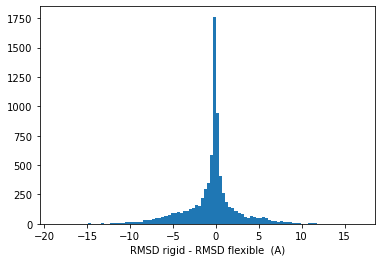

In [30]:
combined['rmsdiff'] = combined.rmsd - combined.rmsd_lig
plt.hist(combined.rmsdiff, bins=100);
plt.xlabel("RMSD rigid - RMSD flexible  (A)")
plt.savefig(f"../figures/crossdocking-flex/e{exhaustiveness}-rmsd-diff_hist.pdf")

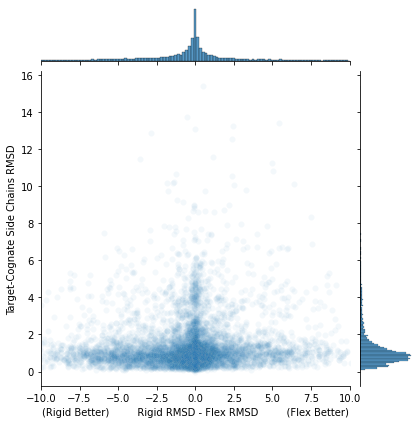

In [31]:
D = combined.dropna()

h = sns.jointplot(data=D, x='rmsdiff', y='target-cognate_rmsd', xlim=(-10,10), alpha=.05)
h.ax_joint.set_xlabel('(Rigid Better)         Rigid RMSD - Flex RMSD         (Flex Better)')
h.ax_joint.set_ylabel('Target-Cognate Side Chains RMSD')
plt.savefig(f"../figures/crossdocking-flex/e{exhaustiveness}-rmsd-diff_vs_side-chain-rmsd.pdf")

In [32]:
goodflex = combined[combined.rmsdiff > 10][["pocket", "rec", "lig", "rmsd", "rmsd_lig", "rmsdiff"]]
goodflex

pocket   rec   lig     rmsd   rmsd_lig    rmsdiff
523   LKHA4  1HS6  3FH7  13.7285   2.904030  10.824470
591    PGH1  1IGZ  3N8X  12.5954   1.604810  10.990590
1325  HIVPR  1T3R  1A8G  12.9874   2.076360  10.911040
1327    KIT  1T46  3G0E  17.8312   1.109090  16.722110
1797  HIVPR  2A1E  3R4B  12.9137   2.199480  10.714220
1922  TRYB1  2BM2  2FWW  13.7043   1.838970  11.865330
2188  TRYB1  2FXR  2ZA5  17.7039   3.403470  14.300430
2189  TRYB1  2FXR  2ZEC  15.2599   0.859261  14.400639
2191  TRYB1  2FXR  5F03  17.8096   4.449250  13.360350
2353  HIVRT  2I5J  2B5J  14.2293   2.500270  11.729030
2646  VGFR2  2P2I  3U6J  11.9243   1.582220  10.342080
3326  TRYB1  2ZEC  2FWW  12.9955   2.244150  10.751350
3484  LKHA4  3B7U  3FH8  13.6388   2.022110  11.616690
3764  VGFR2  3CP9  2QU6  12.4406   1.143040  11.297560
3901  HIVRT  3DOL  5VQX  15.6183   2.799330  12.818970
4455   MK14  3HV4  3U8W  12.6397   0.999160  11.640540
4562    GCR  3K23  4P6X  12.8364   0.794279  12.042121
5498    SRC  3TZ7  4YBJ  15.2729   2.212160  13.060740
5791  TRYB1  4A6L  2FWW  12.3568   1.307140  11.049660
6376   AMPC  4JXG  2HDR  13.0027   2.892530  10.110170
6723  CSF1R  4R7I  3BEA  20.5746  10.305100  10.269500
6725  CSF1R  4R7I  3KRJ  20.2942   8.810140  11.484060
6938   PYRD  4YLW  1D3G  11.3978   0.396863  11.000937
7080  MMP13  5B5P  5BPA  13.4997   0.729450  12.770250
7179   BRAF  5CSW  4H58  14.5111   3.116070  11.395030

In [33]:
combined[combined.rmsdiff < -10][["pocket", "rec", "lig", "rmsd", "rmsd_lig", "rmsdiff"]]

pocket   rec   lig     rmsd  rmsd_lig   rmsdiff
36    HIVPR  1A8K  4CPS  1.17716   11.7346 -10.55744
270    RXRA  1DKF  5LYQ  4.36726   15.1280 -10.76074
274    HMDH  1DQ9  3CCT  3.90915   15.9901 -12.08095
418    RXRA  1FM9  2P1U  1.01385   14.1130 -13.09915
456   FABP4  1G74  3P6C  2.66715   14.6298 -11.96265
...     ...   ...   ...      ...       ...       ...
6799    KIT  4U0I  3G0E  1.13051   17.8545 -16.72399
6829    GCR  4UDD  1NHZ  2.11123   15.4145 -13.30327
7004   PYRD  4ZL1  4JTT  3.99330   14.2661 -10.27280
7013   ESR1  4ZNW  4MG5  2.89741   13.6684 -10.77099
7316  HIVRT  5FDL  3LP2  4.03983   15.4632 -11.42337

[63 rows x 6 columns]

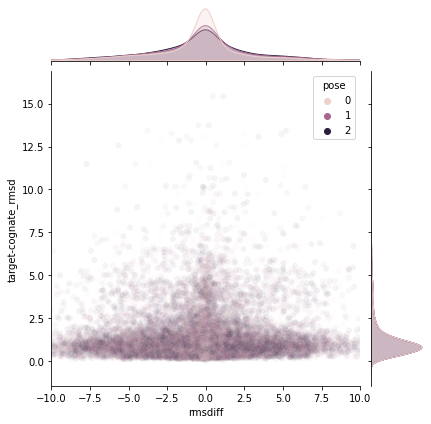

In [34]:
combinedall = pd.merge(rigid, flex, how='inner', on=['rec','lig', "pocket", "pose"], suffixes=['_rigid','_flex'])
combinedall['rmsdiff'] = combinedall.rmsd - combinedall.rmsd_lig
Dall = combinedall.dropna()
h = sns.jointplot(data=Dall[Dall.pose < 3], x='rmsdiff', y='target-cognate_rmsd', hue="pose", xlim=(-10,10), alpha=.05)

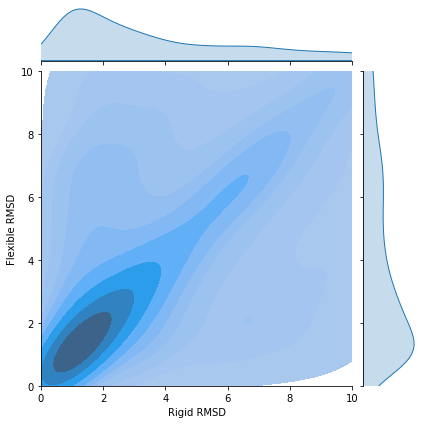

In [35]:
h = sns.jointplot(data=D, x='rmsd',y='rmsd_lig',kind='kde',ylim=(0,10), xlim=(0,10), fill=True)
h.ax_joint.set_xlabel('Rigid RMSD')
h.ax_joint.set_ylabel('Flexible RMSD')
plt.savefig(f"../figures/crossdocking-flex/e{exhaustiveness}-rmsd-flex_vs_rmsd-rigid_corr.pdf")

In [36]:
stats.pearsonr(D.rmsd, D.rmsd_lig)

(0.6397424780686478, 0.0)

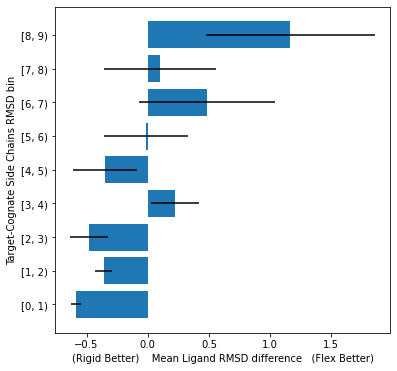

In [37]:
max_bin = 10
cuts = pd.cut(D["target-cognate_rmsd"], range(0,max_bin,1))
C = D.groupby([cuts])

fig, ax = plt.subplots(figsize=(6,6))
ax.barh(list(range(1,max_bin,1)),C.mean().rmsdiff.to_numpy(), xerr=C.sem().rmsdiff)
ax.set_ylabel('Target-Cognate Side Chains RMSD bin')
ax.set_xlabel('(Rigid Better)    Mean Ligand RMSD difference   (Flex Better)')
ax.set_yticks(range(1,max_bin))
ax.set_yticklabels([f"[{i}, {i+1})" for i in range(0,max_bin-1)])
plt.savefig(f"../figures/crossdocking-flex/e{exhaustiveness}-mean-diff-rmsd_vs_flex-rmsd-bin_hist.pdf")

Text(0.5, 0, 'Mean RMSD difference (rigid - flex)')

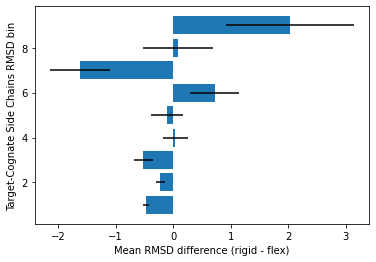

In [38]:
cuts = pd.cut(Dall[Dall.pose == 1]["target-cognate_rmsd"], range(0,10,1))
C = Dall[Dall.pose == 1].groupby([cuts])

fig, ax = plt.subplots()
ax.barh(list(range(1,10,1)), C.mean().rmsdiff.to_numpy(), xerr=C.sem().rmsdiff)
ax.set_ylabel('Target-Cognate Side Chains RMSD bin')
ax.set_xlabel('Mean RMSD difference (rigid - flex)')
#plt.savefig(f"../figures/crossdocking-flex/e{exhaustiveness}-mean-diff-rmsd_vs_flex-rmsd-bin_hist_pose1.pdf")

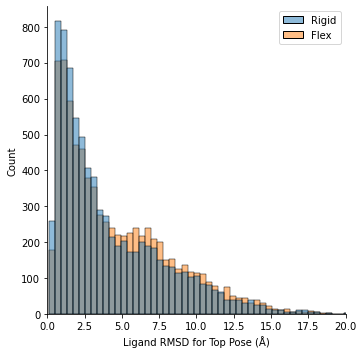

In [39]:
g = sns.displot(data=D.melt(value_vars=["rmsd", "rmsd_lig"]), x="value", hue="variable",
         facet_kws={"legend_out": False})
g._legend.set_title(None)
for t, l in zip(g._legend.texts, ["Rigid", "Flex"]): 
    t.set_text(l)
plt.xlim([0,20])
plt.xlabel("Ligand RMSD for Top Pose (Å)")
#plt.title("Ligand RMSD")
plt.savefig(f"../figures/crossdocking-flex/e{exhaustiveness}-rmsd_dists-LIG.pdf")

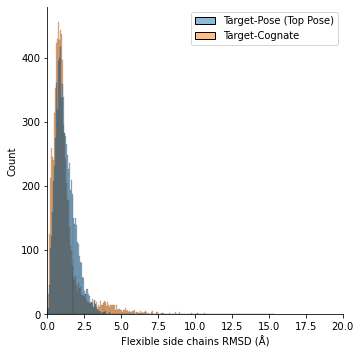

In [40]:
g = sns.displot(data=D.melt(value_vars=["target-pose_rmsd", "target-cognate_rmsd"]), x="value", hue="variable",
         facet_kws={"legend_out": False})
g._legend.set_title(None)
for t, l in zip(g._legend.texts, ["Target-Pose (Top Pose)", "Target-Cognate"]): 
    t.set_text(l)
plt.xlim([0,20])
plt.xlabel("Flexible side chains RMSD (Å)")
plt.savefig(f"../figures/crossdocking-flex/e{exhaustiveness}-rmsd_dists-REC.pdf")